In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('../data/regression_data.csv',usecols=['x','y'])
x = data.x
y = data.y

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

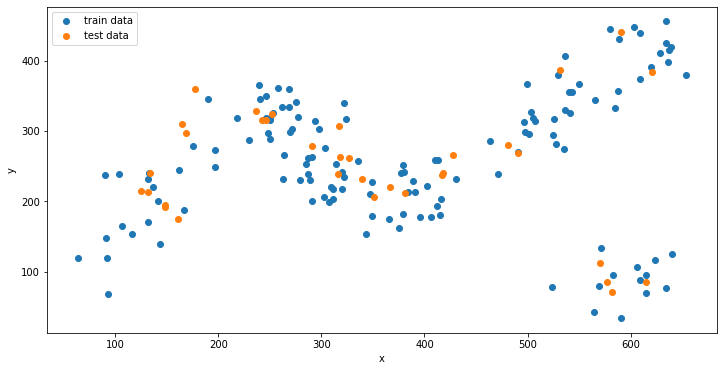

In [4]:
f, ax = plt.subplots(figsize=(12,6))
ax.scatter(x_train,y_train,c='tab:blue',label='train data')
ax.scatter(x_test,y_test,c='tab:orange',label='test data')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()
plt.show()

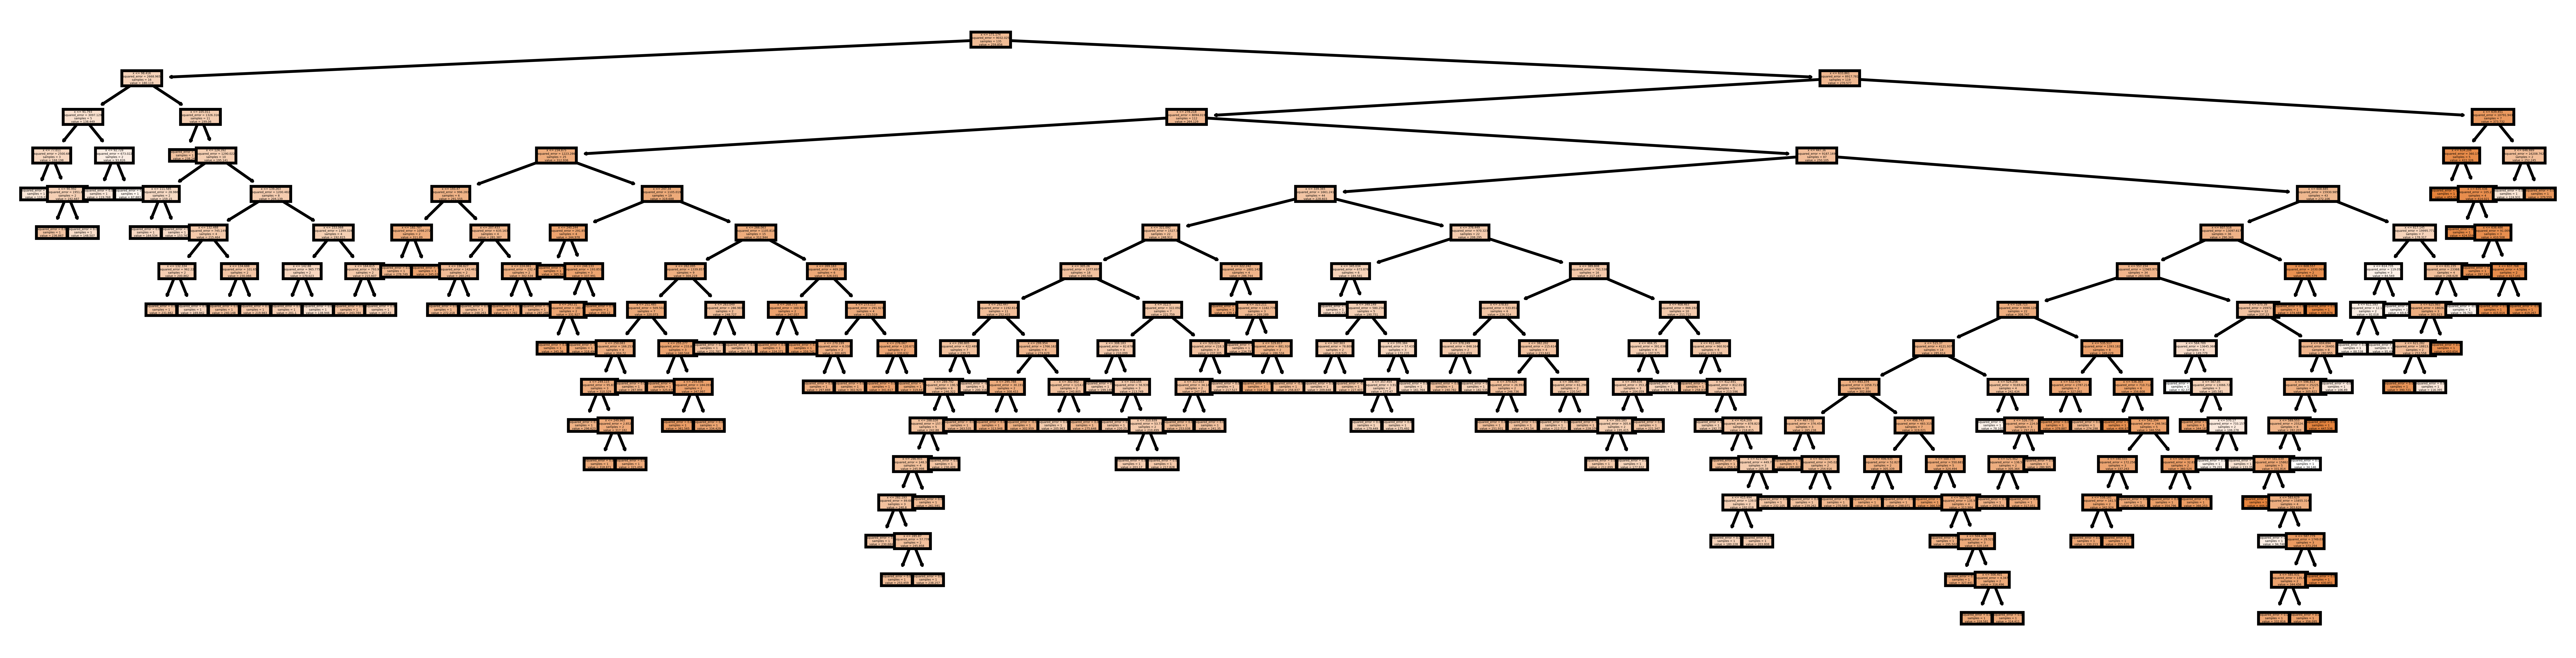

In [9]:
reg = DecisionTreeRegressor(random_state=42)
reg.fit(x_train.values.reshape(-1,1),y_train)

fig = plt.figure(figsize=(16,4),dpi=1000)
_ = tree.plot_tree(reg, 
                   feature_names=['x'],
                   filled=True)

fig.savefig('arv.png')

In [11]:
y_pred = reg.predict(x_test.values.reshape(-1,1))
print(f'RMSE TRAIN : {np.sqrt(mean_squared_error(y_train,reg.predict(x_train.values.reshape(-1,1))))}')
print(f'RMSE TEST  : {np.sqrt(mean_squared_error(y_test,y_pred))}')

RMSE TRAIN : 0.0
RMSE TEST  : 103.95165409697614


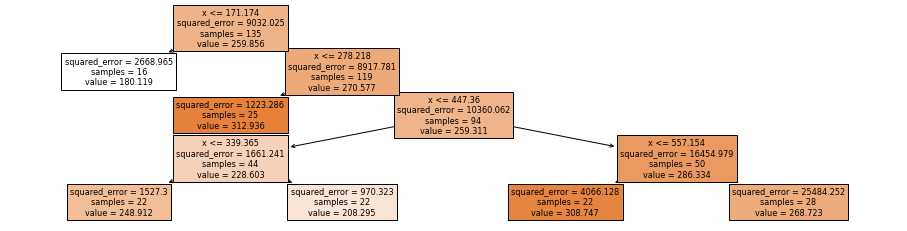

In [25]:
reg = DecisionTreeRegressor(max_depth=5, min_samples_leaf=15, random_state=42)
reg.fit(x_train.values.reshape(-1,1),y_train)

fig = plt.figure(figsize=(16,4))
_ = tree.plot_tree(reg, 
                   feature_names=['x'],
                   filled=True)

In [26]:
y_pred = reg.predict(x_test.values.reshape(-1,1))
print(f'RMSE TRAIN : {np.sqrt(mean_squared_error(y_train,reg.predict(x_train.values.reshape(-1,1))))}')
print(f'RMSE TEST  : {np.sqrt(mean_squared_error(y_test,y_pred))}')

RMSE TRAIN : 83.0549645837976
RMSE TEST  : 82.66017949794242
